(30, 2)


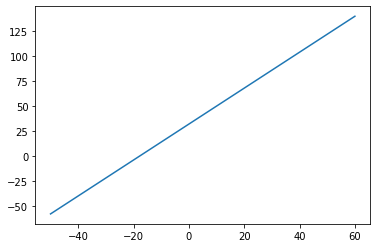

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression

temperature_df = pd.read_csv('/content/celsius_to_fahrenheit.csv')
print(temperature_df.shape)

plt.plot(temperature_df['Celsius'], temperature_df['Fahrenheit'])
plt.show()

In [3]:
temperature_df

,Celsius,Fahrenheit
0,-50,-58.0
1,-40,-40.0
2,-30,-22.0
3,-20,-4.0
4,-10,14.0
5,-9,15.8
6,-8,17.6
7,-7,19.4
8,-6,21.2
9,-5,23.0


In [4]:
temperature_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Celsius     30 non-null     int64  
 1   Fahrenheit  30 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


In [5]:
temperature_df.describe()

,Celsius,Fahrenheit
count,30.000000,30.000000
mean,2.000000,35.600000
std,22.780815,41.005466
min,-50.000000,-58.000000
25%,-6.750000,19.850000
50%,0.500000,32.900000
75%,7.750000,45.950000
max,60.000000,140.000000


In [6]:
perceptron_regressor = tf.keras.models.Sequential()
perceptron_regressor.add(tf.keras.layers.Dense(units=1, input_shape=[1]))
perceptron_regressor.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [7]:
# No train/test split since we can evaluate model coefficients directly.
X_train = temperature_df['Celsius']
y_train = temperature_df['Fahrenheit']

# Patience set to 10 was enough to let our model converge in all tests.
early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor='loss',
                                                           patience=10)

# Large learning rate to train faster.
perceptron_regressor.compile(optimizer=tf.optimizers.Adam(learning_rate=0.1),
                             loss='mean_squared_error')

# Enough epochs to let the early stopping callback work.
training_epochs = perceptron_regressor.fit(X_train, y_train, epochs=2000,
                                           callbacks=[early_stopping_callback])

Epoch 1/2000
1/1 [==============================] - 1s 590ms/step - loss: 4369.4038
Epoch 2/2000
1/1 [==============================] - 0s 10ms/step - loss: 4106.6885
Epoch 3/2000
1/1 [==============================] - 0s 17ms/step - loss: 3854.4851
Epoch 4/2000
1/1 [==============================] - 0s 8ms/step - loss: 3612.9612
Epoch 5/2000
1/1 [==============================] - 0s 7ms/step - loss: 3382.2632
Epoch 6/2000
1/1 [==============================] - 0s 7ms/step - loss: 3162.5088
Epoch 7/2000
1/1 [==============================] - 0s 8ms/step - loss: 2953.7874
Epoch 8/2000
1/1 [==============================] - 0s 8ms/step - loss: 2756.1570
Epoch 9/2000
1/1 [==============================] - 0s 9ms/step - loss: 2569.6428
Epoch 10/2000
1/1 [==============================] - 0s 7ms/step - loss: 2394.2334
Epoch 11/2000
1/1 [==============================] - 0s 8ms/step - loss: 2229.8804
Epoch 12/2000
1/1 [==============================] - 0s 7ms/step - loss: 2076.4958
Epoch 13/

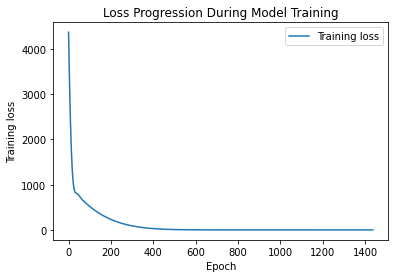

In [10]:
plt.plot(training_epochs.history['loss'])
plt.title("Loss Progression During Model Training")
plt.xlabel("Epoch")
plt.ylabel("Training loss")
plt.legend(["Training loss"])
plt.show()

Perceptron regressor weight:  [[1.8000002]]
Perceptron regressor bias:  [31.99995]
1/1 [==============================] - 0s 239ms/step


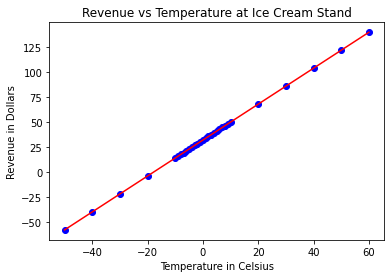

In [9]:
print("Perceptron regressor weight: ", perceptron_regressor.get_weights()[0])
print("Perceptron regressor bias: ", perceptron_regressor.get_weights()[1])

plt.scatter(X_train, y_train, color='b')
plt.plot(X_train, perceptron_regressor.predict(X_train), color='r')
plt.title("Revenue vs Temperature at Ice Cream Stand")
plt.xlabel("Temperature in Celsius")
plt.ylabel("Revenue in Dollars")
plt.show()

Linear regression coefficient:  [[1.8]]
Linear regression intercept:  [32.]


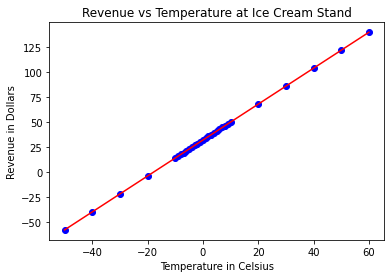

In [ ]:
X_train_reshaped = X_train.values.reshape(-1, 1)
y_train_reshaped = y_train.values.reshape(-1, 1)

linear_regressor = LinearRegression()
linear_regressor.fit(X_train_reshaped, y_train_reshaped)

print("Linear regression coefficient: ", linear_regressor.coef_)
print("Linear regression intercept: ", linear_regressor.intercept_)

plt.scatter(X_train, y_train, color='b')
plt.plot(X_train_reshaped, linear_regressor.predict(X_train_reshaped), color='r')
plt.title("Revenue vs Temperature at Ice Cream Stand")
plt.xlabel("Temperature in Celsius")
plt.ylabel("Revenue in Dollars")
plt.show()

In [ ]:
test_temperature_celsius = 10

print("Perceptron predicted Fahrenheit: ",
      np.round(perceptron_regressor.predict([test_temperature_celsius]), 2))
print("Linear Regression predicted Fahrenheit: ",
      np.round(linear_regressor.predict([[test_temperature_celsius]]), 2))
print("Actual Fahrenheit: ", (9 / 5) * test_temperature_celsius + 32)

Perceptron predicted Fahrenheit:  [[50.]]
Linear Regression predicted Fahrenheit:  [[50.]]
Actual Fahrenheit:  50.0
